Prepare a classification model using Naive Bayes 
for salary data 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('SalaryData_Train.csv')
test = pd.read_csv('SalaryData_Test.csv') 

In [3]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


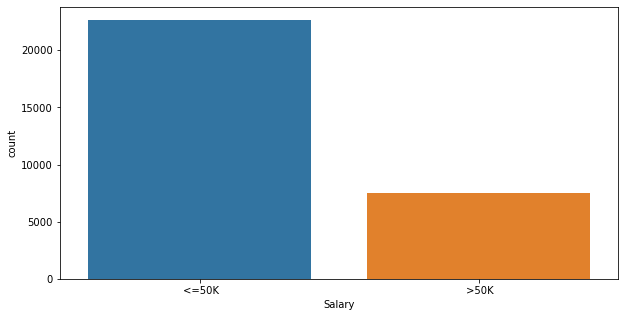

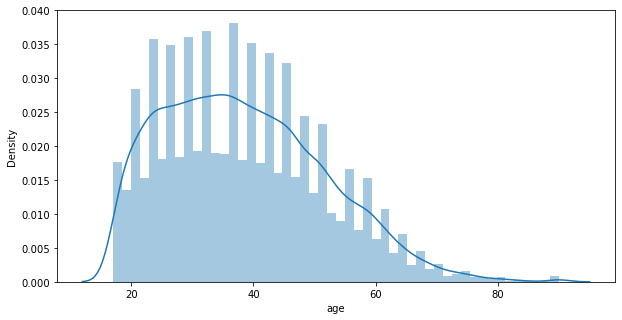

<module 'matplotlib.pyplot' from 'C:\\Users\\jaevi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

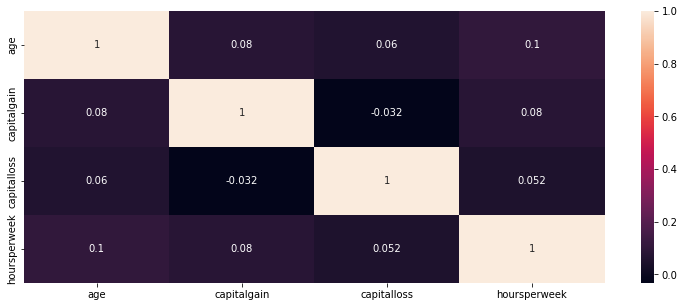

In [9]:
plt.rcParams['figure.figsize'] = (10,5)

sns.countplot(train['Salary'])
plt.show()

sns.distplot(train['age'])
plt.show()

plt.rcParams['figure.figsize'] = (13,5)
sns.heatmap(train[['age', 'capitalgain', 'capitalloss', 'hoursperweek']].corr(), annot=True)
plt

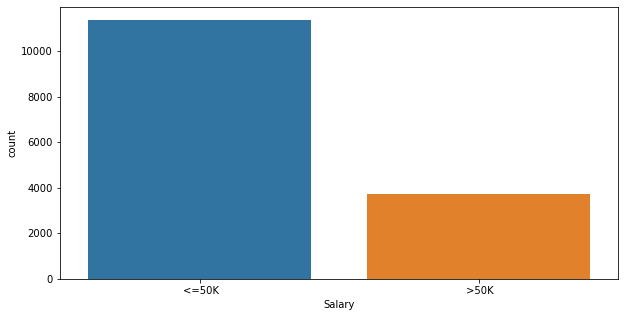

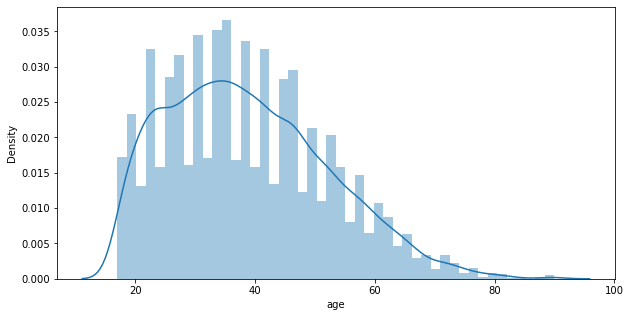

<module 'matplotlib.pyplot' from 'C:\\Users\\jaevi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

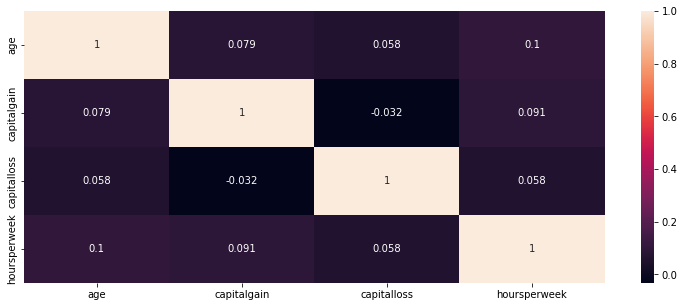

In [3]:
plt.rcParams['figure.figsize'] = (10,5)

sns.countplot(test['Salary'])
plt.show()

sns.distplot(test['age'])
plt.show()

plt.rcParams['figure.figsize'] = (13,5)
sns.heatmap(test[['age', 'capitalgain', 'capitalloss', 'hoursperweek']].corr(), annot=True)
plt

In [10]:
cat_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

In [11]:
enc = OneHotEncoder(handle_unknown='error')
enc.fit(train[cat_cols])

OneHotEncoder()

In [12]:
train_enc = pd.DataFrame(enc.transform(train[cat_cols]).toarray(), columns=enc.get_feature_names(cat_cols))
test_enc = pd.DataFrame(enc.transform(test[cat_cols]).toarray(), columns=enc.get_feature_names(cat_cols))

In [13]:
train_processed = pd.concat([train.drop(cat_cols, axis=1), train_enc], axis=1)
test_processed = pd.concat([test.drop(cat_cols, axis=1), test_enc], axis=1)

In [14]:
X_train = train_processed.drop('Salary', axis=1)
y_train = train_processed['Salary']

In [15]:
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,0,0,13,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30157,40,9,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30158,58,9,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30159,22,9,0,0,20,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [17]:
X_test = test_processed.drop('Salary', axis=1)
y_test = test_processed['Salary']

In [18]:
X_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,9,0,0,50,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,12,0,0,40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,10,7688,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34,6,0,0,30,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15056,39,13,0,0,36,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15057,38,13,0,0,50,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15058,44,13,5455,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [20]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [21]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [24]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       <=50K       0.80      0.93      0.86      9754
        >50K       0.82      0.57      0.67      5306

    accuracy                           0.80     15060
   macro avg       0.81      0.75      0.76     15060
weighted avg       0.80      0.80      0.79     15060



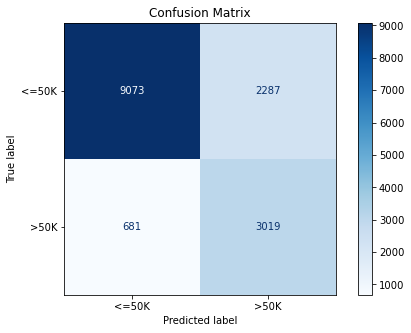

In [25]:
plt.rcParams['figure.figsize'] = (8,5)
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=['<=50K', '>50K'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion Matrix")

plt.show()

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



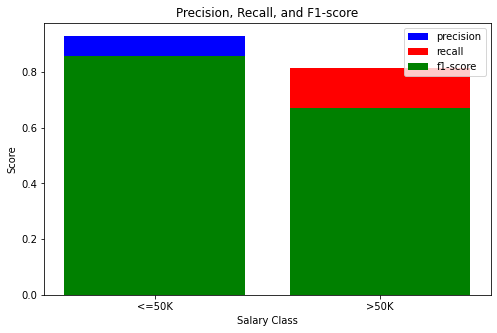

In [26]:
plt.rcParams['figure.figsize'] = (12,7)

print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

plt.figure()
plt.bar(['<=50K', '>50K'], precision, color='blue', label='precision')
plt.bar(['<=50K', '>50K'], recall, color='red', label='recall')
plt.bar(['<=50K', '>50K'], f1_score, color='green', label='f1-score')
plt.xlabel('Salary Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score')
plt.legend()
plt.show()

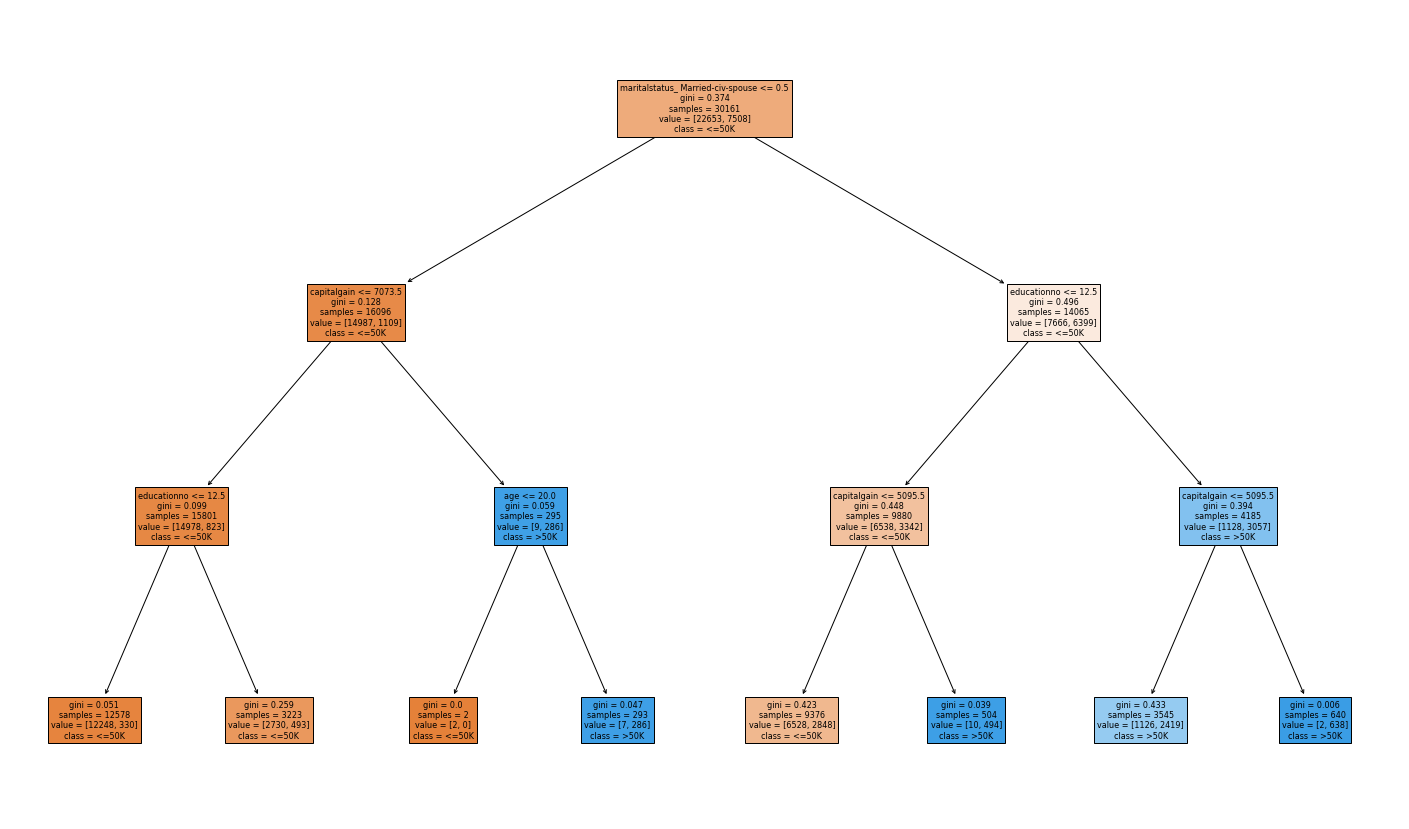

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(25, 15))

plot_tree(tree_clf, feature_names=X_train.columns,class_names=['<=50K', '>50K'], filled=True, ax=ax)
plt.show()
